<a href="https://colab.research.google.com/github/pyInvenio/PlayingwithML/blob/main/cloud_is_always_the_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from PIL import Image
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [2]:
print(device)

cuda


In [4]:
 !pip install salesforce-lavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.8/495.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 KB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 119.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB

In [3]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess

torch.cuda.empty_cache()

# loads BLIP-2 pre-trained model
model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device)

  0%|          | 0.00/1.89G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0.00/407M [00:00<?, ?B/s]

In [4]:
import requests

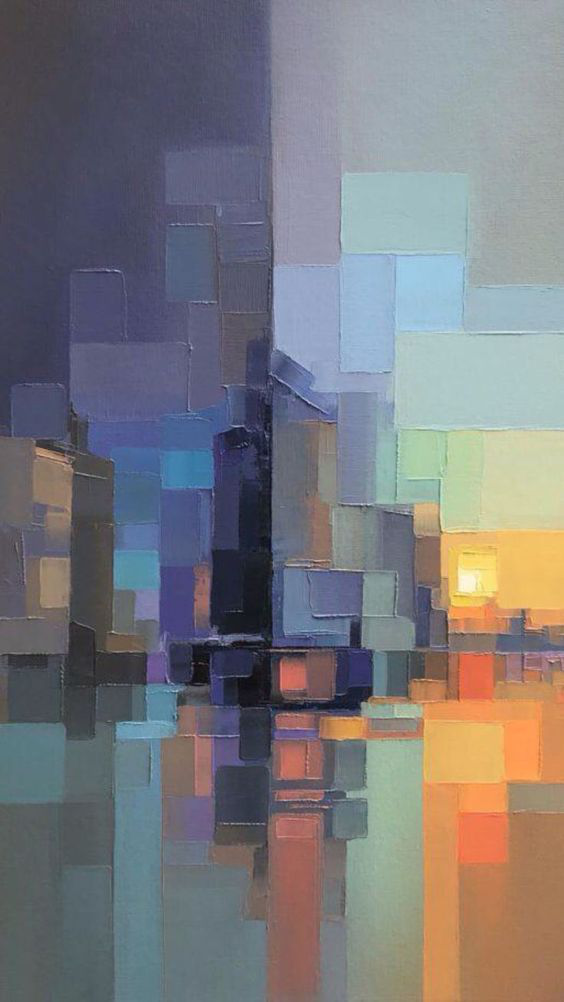

In [123]:
img_url = 'https://i.pinimg.com/564x/af/af/d7/afafd746e8932456d507fa31aa3aa6c2.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
display(raw_image)

In [124]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [125]:
model.generate({"image": image})

['an abstract painting of a city at sunset']

In [128]:
model.generate({
    "image":image,
    "prompt": "Question: Write a sad message that goes along with this image"
})

["i'm so sad i'm so sad i'm so sad i'm so sad i'm so sad"]

In [122]:
model.generate({
    "image":image,
    "prompt": "Question: Did Alexander McQueen design this? Answer: No Question: Who designed this?"
})

['Answer: unknown']

In [101]:
model.generate({
    "image":image,
    "prompt": "Question: Is this AI Generated? Answer: Yes Question: Why?"
})

['Answer: it is a photo of a japanese woman sitting in front of a window']

In [102]:
model.generate({
    "image":image,
    "prompt": "Question: When was this drawn?"
})

['1939']